# Energy System Modeling for France - PyPSA Model

##### Importing data analysis libraries

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt

##### Importing Pypsa

In [2]:
import pypsa

##### Importing Additional libraries

In [3]:
plt.style.use('bmh')
import warnings
warnings.filterwarnings("ignore")
import copy
import xarray as xr
from pathlib import Path

#### Power plants and separation by region.

In [13]:
# Read the global power plant database
powerplant_df = pd.read_csv("../data/global_power_plant_database.csv")

# Filter for power plants in France
powerplant_df = powerplant_df[powerplant_df['country'] == 'FRA']

# Exclude existing wind and solar power plants
powerplant_df = powerplant_df.drop(powerplant_df[powerplant_df['primary_fuel'].isin(["Solar", "Wind"])].index)

# Create a GeoDataFrame and reset the index
powerplant_df = gpd.GeoDataFrame(powerplant_df, geometry=gpd.points_from_xy(powerplant_df['longitude'], powerplant_df['latitude']))
powerplant_df.reset_index(drop=True, inplace=True)

In [14]:
powerplant_df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry
0,FRA,France,ARRIGHI,WRI1002687,254.000,48.7872,2.4033,Oil,NaN,NaN,...,NaN,NaN,NaN,271.68,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (2.4033 48.7872)
1,FRA,France,ASTON,WRI1002688,104.000,42.7770,1.6770,Hydro,NaN,NaN,...,301.46,352.24,302.29,352.24,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (1.677 42.777)
2,FRA,France,AVIGNON,WRI1002689,126.000,43.9760,4.8170,Hydro,NaN,NaN,...,587.61,374.82,379.85,459.52,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (4.817 43.976)
3,FRA,France,Agos-Vidalos,WRI1025409,1.600,43.0398,-0.0753,Hydro,NaN,NaN,...,4.70,5.95,4.83,5.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (-0.0753 43.0398)
4,FRA,France,Aiguillon,WRI1025631,1.177,44.3009,0.3577,Hydro,NaN,NaN,...,3.85,4.68,3.82,4.24,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (0.3577 44.3009)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,FRA,France,Épierre,WRI1024859,5.880,45.4523,6.3254,Hydro,NaN,NaN,...,21.85,23.56,20.64,22.74,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (6.3254 45.4523)
613,FRA,France,Épinal,WRI1025648,1.150,48.1630,6.4795,Hydro,NaN,NaN,...,4.68,5.22,4.78,5.13,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (6.4795 48.163)
614,FRA,France,Étampes,WRI1025256,2.126,48.4218,2.1378,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,POINT (2.1378 48.4218)
615,FRA,France,Éteignières,WRI1025460,1.480,49.8907,4.4031,Biomass,NaN,NaN,...,NaN,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,POINT (4.4031 49.8907)


<Axes: >

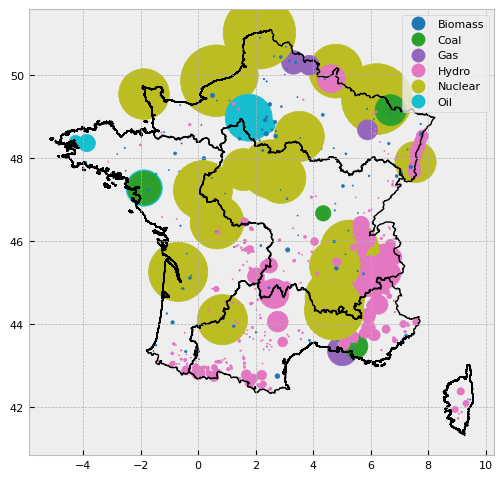

In [242]:
fra_df=df.overlay(fra_regions, how='intersection')
fig, ax = plt.subplots(figsize=(6,6))
fra_df.plot(ax=ax, column='primary_fuel', markersize=fra_df['capacity_mw']/2, legend=True)

fra_regions.plot(ax=ax, color='None', edgecolor='k', linewidth=1)

In [243]:
df[df.region.isna()] # Finding region with NaN value

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry,region
79,FRA,France,Bouillante,WRI1024960,4.500,16.1272,-61.7690,Geothermal,NaN,NaN,...,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,POINT (-61.76900 16.12720),NaN
206,FRA,France,Fort-de-France,WRI1024796,6.600,14.6409,-61.0692,Biomass,NaN,NaN,...,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,POINT (-61.06920 14.64090),NaN
329,FRA,France,Mana,WRI1024966,4.480,4.9917,-53.6455,Hydro,NaN,NaN,...,17.74,14.87,18.03,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (-53.64550 4.99170),NaN
338,FRA,France,Mda Mill,WRI1023121,11.200,-21.3200,55.4700,Biomass,NaN,NaN,...,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,POINT (55.47000 -21.32000),NaN
432,FRA,France,RANCE,WRI1002761,240.000,48.6180,-2.0220,Wave and Tidal,NaN,NaN,...,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,POINT (-2.02200 48.61800),NaN
510,FRA,France,Saint-Pierre,WRI1025253,2.130,-21.3250,55.4909,Biomass,NaN,NaN,...,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,POINT (55.49090 -21.32500),NaN
530,FRA,France,Sainte-Suzanne,WRI1025316,1.898,-20.9511,55.5908,Biomass,NaN,NaN,...,NaN,NaN,NaN,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,POINT (55.59080 -20.95110),NaN


In [244]:
df.loc[[79, 206, 329, 338, 432, 510, 530], "region"] = ['W', 'W', 'W', 'C', 'C', 'N', 'S']
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017,geometry,region
0,FRA,France,ARRIGHI,WRI1002687,254.000,48.7872,2.4033,Oil,NaN,NaN,...,NaN,NaN,271.68,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1,POINT (2.40330 48.78720),N
1,FRA,France,ASTON,WRI1002688,104.000,42.7770,1.6770,Hydro,NaN,NaN,...,352.24,302.29,352.24,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (1.67700 42.77700),S
2,FRA,France,AVIGNON,WRI1002689,126.000,43.9760,4.8170,Hydro,NaN,NaN,...,374.82,379.85,459.52,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (4.81700 43.97600),S
3,FRA,France,Agos-Vidalos,WRI1025409,1.600,43.0398,-0.0753,Hydro,NaN,NaN,...,5.95,4.83,5.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (-0.07530 43.03980),S
4,FRA,France,Aiguillon,WRI1025631,1.177,44.3009,0.3577,Hydro,NaN,NaN,...,4.68,3.82,4.24,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,POINT (0.35770 44.30090),W


In [245]:
# Grouping Powerplants with respect to primary fuel and capacity
df_fossils = df.groupby(["region", "primary_fuel"])["capacity_mw"].sum().unstack().fillna(0)
df_fossils

primary_fuel,Biomass,Coal,Gas,Geothermal,Hydro,Nuclear,Oil,Wave and Tidal
region,,,,,,,,
C,171.747,245.0,0.0,0.0,9303.0400,25200.0,0.0,240.0
I,1.688,0.0,0.0,0.0,146.3900,0.0,0.0,0.0
N,353.250,1575.0,3652.0,0.0,2116.5419,28680.0,2544.0,0.0
S,149.687,595.0,1355.0,0.0,6846.4430,2620.0,0.0,0.0
W,116.228,1160.0,0.0,4.5,1093.3650,6630.0,1844.0,0.0


In [246]:
df_fossils = df_fossils.drop(columns=["Biomass", "Geothermal", "Wave and Tidal"])
df_fossils

primary_fuel,Coal,Gas,Hydro,Nuclear,Oil
region,,,,,
C,245.0,0.0,9303.0400,25200.0,0.0
I,0.0,0.0,146.3900,0.0,0.0
N,1575.0,3652.0,2116.5419,28680.0,2544.0
S,595.0,1355.0,6846.4430,2620.0,0.0
W,1160.0,0.0,1093.3650,6630.0,1844.0


In [247]:
# Hydro plants calculations
hydro_nom = df_fossils.Hydro.sum()
hydro_generation = df.groupby("primary_fuel").estimated_generation_gwh_2017.sum().loc["Hydro"]* 1e3
c_f_H = hydro_generation / (hydro_nom * 8760)
df_fossils["Hydro"] = df_fossils["Hydro"] * c_f_H
df_fossils

primary_fuel,Coal,Gas,Hydro,Nuclear,Oil
region,,,,,
C,245.0,0.0,3485.678905,25200.0,0.0
I,0.0,0.0,54.849655,0.0,0.0
N,1575.0,3652.0,793.029531,28680.0,2544.0
S,595.0,1355.0,2565.236948,2620.0,0.0
W,1160.0,0.0,409.663864,6630.0,1844.0


#### Load Data

In [248]:
load_ts = pd.read_csv("../data/load.csv",index_col="time")
load_ts = load_ts["FR"]
load_ts = load_ts.to_frame()

In [248]:
population_state = {"Auvergne - Rhône - Alpes": 8078652,
                    "Bourgogne - Franche-Comté": 2801695,
                    "Bretagne": 3373835,
                    "Centre - Val de Loire": 2574863,
                    "Corse": 343701,
                    "Grand Est": 5562651,
                    "Hauts-de-France": 5997734,
                    "Île-de-France": 12271794,
                    "Normandie": 3325522,
                    "Nouvelle-Aquitaine": 6033952,
                    "Occitanie": 5973969,
                    "Pays de la Loire": 3832120,
                    "Provence - Alpes - Côte d'Azur": 5098666}

population_state = pd.DataFrame.from_dict(population_state, orient="index")
population_state.rename(columns={0: 'total_population'}, inplace=True)
population_state["percentage"] = population_state["total_population"] / population_state.total_population.sum() * 100
population_state["regions"] = [2, 2, 3, 3, 5, 1, 1, 1, 1, 3, 4, 3, 4]

population_region = population_state.groupby("regions").agg({
    "percentage": "sum",
    "total_population": "sum"
})
population_region.rename(index=dict, inplace=True)
population_region

In [249]:
population_region

,percentage,total_population
regions,,
N,41.608784,27157701
C,16.669968,10880347
W,24.230083,15814770
S,16.964576,11072635
I,0.526590,343701


In [250]:
# Finding demand per region based on the population % of each region with respect to total population
for i in range(len(population_region)):
    load_ts[population_region.index[i]] = load_ts["FR"].values * population_region.iloc[i,0]/100

load_ts = load_ts.drop(columns='FR')
load_ts.head()

,N,C,W,S,I
time,,,,,
2013-01-01 00:00:00,22113.392154,8859.416339,12877.312805,9015.988501,279.861502
2013-01-01 01:00:00,21657.176069,8676.639848,12611.644055,8829.981807,274.087747
2013-01-01 02:00:00,21573.416622,8643.082816,12562.868337,8795.831722,273.027708
2013-01-01 03:00:00,21573.416622,8643.082816,12562.868337,8795.831722,273.027708
2013-01-01 04:00:00,22577.718781,9045.442204,13147.704573,9205.301995,285.737903


In [251]:
load_ts.index = pd.to_datetime(load_ts.index)
load_ts = load_ts.iloc[:8760]  # Truncate to 8760 elements

onwind_c_f = onwind_c_f.iloc[:8760]  # Truncate to 8760 elements
offwind_c_f = offwind_c_f.iloc[:8760]  # Truncate to 8760 elements
solar_c_f = solar_c_f.iloc[:8760]  # Truncate to 8760 elements

# Align the indices using reindex
onwind_c_f = onwind_c_f.reindex(load_ts.index)
offwind_c_f = offwind_c_f.reindex(load_ts.index)
solar_c_f = solar_c_f.reindex(load_ts.index)

# Downsampling capacity factor and Load based on resolution
resolution = 11
load_ts = load_ts.resample(f"{resolution}H").first()
onwind_c_f = onwind_c_f.resample(f"{resolution}H").first()
offwind_c_f = offwind_c_f.resample(f"{resolution}H").first()
solar_c_f = solar_c_f.resample(f"{resolution}H").first()

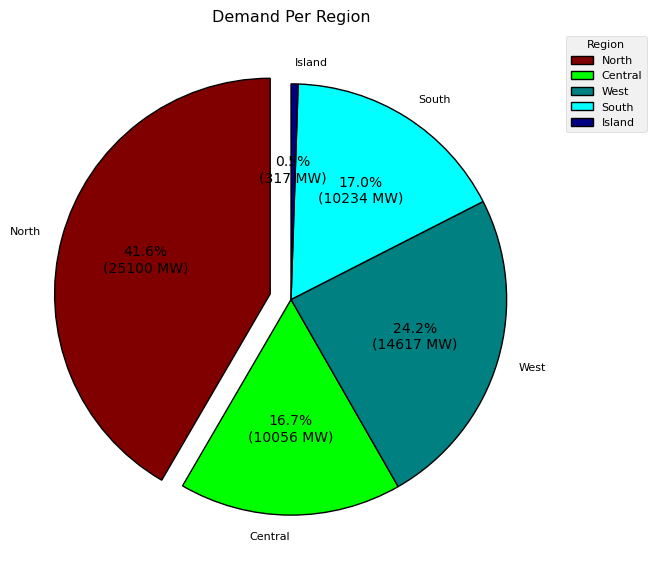

In [252]:
df_loads_mean = load_ts.mean()
df_loads_mean = pd.DataFrame(df_loads_mean, columns = ['Average_Load'])
# df_loads_mean['Average_Load'] = df_loads_mean['Average_Load'] / 1e3

# Creating Demand Pie Chart
explode = (0.1, 0.0, 0.0, 0.0, 0.0)
Regions = ["North", "Central","West", "South", "Island"]
# Creating color parameters
colors = ( "maroon", "lime", "teal", "aqua", "navy")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "black" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} MW)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(df_loads_mean.Average_Load,
                                  autopct = lambda pct: func(pct, df_loads_mean.Average_Load),
                                  explode = explode,
                                  labels = Regions,
                                  colors = colors,
                                  startangle = 90,
                                  wedgeprops = wp
                                  )

# Adding legend
ax.legend(wedges, Regions,
          title ="Region",
          loc ="upper left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 10)
ax.set_title("Demand Per Region")
# plt.text(-1.5,1, f' Total Demand {round(df_loads_mean.sum().item(),1)} GW')

# show plot
plt.show()

#### VOM and FOM cost addition

In [253]:
year = 2025
url = f"https://raw.githubusercontent.com/PyPSA/technology-data/master/outputs/costs_{year}.csv"
costs = pd.read_csv(url, index_col=[0,1])

In [254]:
# Function for annuity calculation:
def annuity(r, n):
    return r / (1.0 - 1.0 / (1.0 + r) ** n)

In [255]:
costs.loc[costs.unit.str.contains("/kW"), "value"] *= 1e3
costs['unit'] = costs.unit.str.replace("/kW", "/MW")

defaults = {
    "FOM": 0,
    "VOM": 0,
    "efficiency": 1,
    "fuel": 0,
    "investment": 0,
    "lifetime": 25,
    "CO2 intensity": 0,
    "discount rate": 0.07,
}
costs = costs['value'].unstack().fillna(defaults)

# Fixing costs for OCGT/CCGT
ocgt_gas_fuel_cost = costs.loc["gas", "fuel"]
ocgt_gas_co2_intensity = costs.loc["gas", "CO2 intensity"]

costs.loc[["OCGT", "CCGT"], "fuel"] = ocgt_gas_fuel_cost
costs.loc[["OCGT", "CCGT"], "CO2 intensity"] = ocgt_gas_co2_intensity

In [256]:
annuity = costs.apply(lambda x: annuity(x["discount rate"], x["lifetime"]), axis=1)
costs["marginal_cost"] = costs["VOM"] + costs["fuel"] / costs["efficiency"]
costs["capital_cost"] = (annuity + costs["FOM"] / 100) * costs["investment"]

#### Building the pypsa network

In [580]:
n = pypsa.Network()
n.snapshot_weightings.loc[:,:] = resolution
points = provinces.representative_point()
points = points.to_frame()
points["x"] = points.centroid.x
points["y"] = points.centroid.y

#### Bus Creation

In [581]:
for i in range(1,6):
    n.add("Bus", f"{region_names[i-1]}",y=points.iloc[i-1,2] , x=points.iloc[i-1,1])

In [582]:
n.set_snapshots(load_ts.index) 

In [583]:
carriers = ["offwind","onwind","solar","coal" , "gas" , "hydro" , "nuclear" , "oil","hydrogen storage underground", "battery storage"]

n.madd(
    "Carrier",
    carriers,
    color=["turquoise", "steelblue", "gold", "dimgray", "indianred", "limegreen", "darkorange", "chocolate", "orchid", "mediumseagreen"],
    co2_emissions=[costs.at[c, "CO2 intensity"] for c in carriers]
)
n.add(
    "Carrier",
    "HVAC",
    color = "brown",
    co2_emissions = 0
)

#### Generators

In [584]:
pv_new = pv.copy()
solar_new = pv_new.copy()

In [585]:
onwind_new = onwind.copy()

In [586]:
offshore_new = offshore.copy()

In [587]:
solar_new = solar_new.rename(columns={"C": "solar C", "I": "solar I","W": "solar W","N": "solar N","S": "solar S"})
solar_new

Region_Abb,solar C,solar I,solar N,solar S,solar W
time,,,,,
2022-01-01 00:00:00,0.0,0.0,0.0,0.0,0.0
2022-01-01 01:00:00,0.0,0.0,0.0,0.0,0.0
2022-01-01 02:00:00,0.0,0.0,0.0,0.0,0.0
2022-01-01 03:00:00,0.0,0.0,0.0,0.0,0.0
2022-01-01 04:00:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2022-12-31 19:00:00,0.0,0.0,0.0,0.0,0.0
2022-12-31 20:00:00,0.0,0.0,0.0,0.0,0.0
2022-12-31 21:00:00,0.0,0.0,0.0,0.0,0.0


In [588]:
offshore_new = offshore_new.rename(columns={"C": "offwind C", "I": "offwind I","W": "offwind W","N": "offwind N","S": "offwind S"})
offwind_new = offshore_new.copy()
offwind_new

Region_Abb,offwind I,offwind N,offwind S,offwind W
time,,,,
2022-01-01 00:00:00,0.015225,0.884606,0.000064,0.873410
2022-01-01 01:00:00,0.013265,0.899868,0.000000,0.878997
2022-01-01 02:00:00,0.013248,0.920592,0.000000,0.869654
2022-01-01 03:00:00,0.012220,0.928703,0.000013,0.835285
2022-01-01 04:00:00,0.015466,0.945480,0.000632,0.790913
...,...,...,...,...
2022-12-31 19:00:00,0.066432,1.000000,0.545062,0.999777
2022-12-31 20:00:00,0.075164,1.000000,0.517229,0.999614
2022-12-31 21:00:00,0.090824,1.000000,0.520423,0.999385


In [589]:
onwind_new = onwind_new.rename(columns={"C": "onwind C", "I": "onwind I","W": "onwind W","N": "onwind N","S": "onwind S"})
onwind_new

Region_Abb,onwind C,onwind I,onwind N,onwind S,onwind W
time,,,,,
2022-01-01 00:00:00,0.053631,0.018719,0.220594,0.059143,0.302868
2022-01-01 01:00:00,0.065558,0.015292,0.205279,0.050494,0.327560
2022-01-01 02:00:00,0.081735,0.017695,0.221436,0.038341,0.348151
2022-01-01 03:00:00,0.096376,0.018583,0.240627,0.034971,0.333121
2022-01-01 04:00:00,0.108373,0.015582,0.251487,0.038064,0.312551
...,...,...,...,...,...
2022-12-31 19:00:00,0.767820,0.000944,0.987204,0.300256,0.878592
2022-12-31 20:00:00,0.789535,0.003127,0.988305,0.301391,0.882575
2022-12-31 21:00:00,0.801122,0.010698,0.989367,0.292257,0.881946


In [591]:
generators = ["coal" , "gas" , "hydro" , "nuclear" , "oil"]

for i in range(1,6):
    for g in generators:
        n.add(
            "Generator",
            f"{g} {region_names[i-1]}",
            bus= f'{region_names[i-1]}',
            carrier= f"{g}",
            capital_cost=costs.at[g, "capital_cost"],
            marginal_cost=costs.at[g, "marginal_cost"],
            efficiency=costs.at[g, "efficiency"],
            p_nom_extendable=False,
            p_nom = df_fossils.iloc[i-1, generators.index(g)],
        )

In [598]:
solar = pv.copy()
offwind = offshore.copy()

In [603]:
#New version
# Adding renewable energy generators
myVars = globals()
for carr in ["solar","offwind","onwind"]:
    for i in range(1,6):
        if (carr=="offwind" and i==1) or (carr=="offwind" and i==5):
            continue
        else:
            n.add(
                "Generator",
                f"{carr} {region_names[i-1]}",
                bus=f'{region_names[i-1]}',
                carrier=f"{carr}",
                p_max_pu=myVars[f"{carr}"][region_names[i-1]],
                capital_cost=costs.at[f"{carr}", "capital_cost"],
                marginal_cost=costs.at[f"{carr}", "marginal_cost"],
                efficiency=costs.at[f"{carr}", "efficiency"],
                p_nom_extendable=True,
                p_nom = myVars[f"{carr}_cap"].at[ region_names[i-1] , "Cap per region"] * 6
            )

In [300]:
#Old version
# Adding renewable energy generators
myVars = globals()
for carr in ["solar","offwind","onwind"]:
    for i in range(1,6):
        if carr=="offwind" and i==5:
            continue
        else:
            n.add(
                "Generator",
                f"{carr} {region_names[i-1]}",
                bus=f'{region_names[i-1]}',
                carrier=f"{carr}",
                p_max_pu=myVars[f"{carr}_cap"].loc[region_names[i-1]],
                capital_cost=costs.at[f"{carr}", "capital_cost"],
                marginal_cost=costs.at[f"{carr}", "marginal_cost"],
                efficiency=costs.at[f"{carr}", "efficiency"],
                p_nom_extendable=True,
                p_nom_max = myVars[f"{carr}_cap"].at[ region_names[i-1] , "Cap per region"] * 6
            )

In [606]:
for i in range(1,6):
    n.add(
        "Load",
        f"Demand {region_names[i-1]}",
        bus=f"{region_names[i-1]}",
        p_set=load_ts.iloc[:,i-1],
    )

#### Storage

In [607]:
#Battery storage
for i in range(1,6):
    n.add(
        "StorageUnit",
        f"battery storage {region_names[i-1]}",
        bus=f'{region_names[i-1]}',
        carrier="battery storage",
        max_hours=6,
        capital_cost=costs.at["battery inverter", "capital_cost"] + 6 * costs.at["battery storage", "capital_cost"],
        efficiency_store=costs.at["battery inverter", "efficiency"],
        efficiency_dispatch=costs.at["battery inverter", "efficiency"],
        p_nom_extendable=True,
        cyclic_state_of_charge=True,
    )

In [608]:
#Hydrogen storage
capital_costs = (
        costs.at["electrolysis", "capital_cost"] +
        costs.at["fuel cell", "capital_cost"] +
        336 * costs.at["hydrogen storage underground", "capital_cost"]
)

for i in range(1,6):
    n.add(
        "StorageUnit",
        f"hydrogen storage underground {region_names[i-1]}",
        bus=f'{region_names[i-1]}',
        carrier="hydrogen storage underground",
        max_hours=336,
        capital_cost=capital_costs,
        efficiency_store=costs.at["electrolysis", "efficiency"],
        efficiency_dispatch=costs.at["fuel cell", "efficiency"],
        p_nom_extendable=True,
        cyclic_state_of_charge=True,
    )

#### Link Creation

In [609]:
distances

,C,I,N,S,W
Region_Abb,,,,,
C,0.000000,649.009416,314.815574,310.530074,244.208662
I,649.009416,0.000000,936.600016,478.915068,790.302902
N,314.815574,936.600016,0.000000,619.856814,405.711486
S,310.530074,478.915068,619.856814,0.000000,332.823265
W,244.208662,790.302902,405.711486,332.823265,0.000000


In [610]:
region_names3 = ['C', 'I', 'N', 'S', 'W']

In [611]:
# Adding Links for buses next to each other
for i in range(1,2):
    n.add(
        "Link",
        f"{region_names[i-1]}-{region_names[i]}",
        bus0 = f"{region_names[i-1]}",
        bus1 = f"{region_names[i]}",
        efficiency = 1,
        marginal_cost = 0,
        p_min_pu = -1,
        length = distances[region_names3[i-1]][region_names3[i]] * 1.5,
        capital_cost = 400 * distances[region_names3[i-1]][region_names3[i]] *1.5,
        p_nom_extendable = True,
        carrier = "HVAC",
    )

In [612]:
# Adding Links for buses next to each other
for i in range(4,5):
    n.add(
        "Link",
        f"{region_names[i-1]}-{region_names[i]}",
        bus0 = f"{region_names[i-1]}",
        bus1 = f"{region_names[i]}",
        efficiency = 1,
        marginal_cost = 0,
        p_min_pu = -1,
        length = distances[region_names3[i-1]][region_names3[i]] * 1.5,
        capital_cost = 400 * distances[region_names3[i-1]][region_names3[i]] *1.5,
        p_nom_extendable = True,
        carrier = "HVAC",
    )

In [613]:
n.add(
    "Link",
    name = "C-N",
    bus0 = "C",
    bus1 = "N",
    efficiency = 1,
    marginal_cost = 0,
    p_min_pu = -1,
    length = distances.iloc[0,2]*1.5,
    capital_cost = 400 * distances.iloc[0,2]*1.5,
    p_nom_extendable = True,
    carrier = "HVAC",
)

In [614]:
n.add(
    "Link",
    name = "C-W",
    bus0 = "C",
    bus1 = "W",
    efficiency = 1,
    marginal_cost = 0,
    p_min_pu = -1,
    length = distances.iloc[0,2]*1.5,
    capital_cost = 400 * distances.iloc[0,2]*1.5,
    p_nom_extendable = True,
    carrier = "HVAC",
)

In [615]:
n.add(
    "Link",
    name = "C-S",
    bus0 = "C",
    bus1 = "S",
    efficiency = 1,
    marginal_cost = 0,
    p_min_pu = -1,
    length = distances.iloc[0,3]*1.5,
    capital_cost = 400 * distances.iloc[0,3]*1.5,
    p_nom_extendable = True,
    carrier = "HVAC",
)

In [616]:
n.add(
    "Link",
    name = "I-S",
    bus0 = "I",
    bus1 = "S",
    efficiency = 1,
    marginal_cost = 0,
    p_min_pu = -1,
    length = distances.iloc[1,3]*1.5,
    capital_cost = 400 * distances.iloc[1,3]*1.5,
    p_nom_extendable = True,
    carrier = "HVAC",
)

In [617]:
n.add(
    "Link",
    name = "N-W",
    bus0 = "N",
    bus1 = "W",
    efficiency = 1,
    marginal_cost = 0,
    p_min_pu = -1,
    length = distances.iloc[2,4]*1.5,
    capital_cost = 400 * distances.iloc[2,4]*1.5,
    p_nom_extendable = True,
    carrier = "HVAC",
)

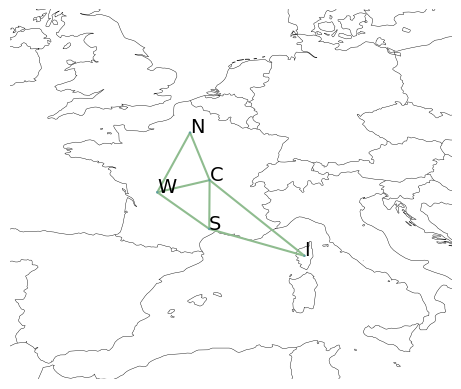

In [618]:
n.plot(margin=1, bus_sizes=0.005)
for i, txt in enumerate(region_names):
    plt.annotate(txt, (points.x[i], points.y[i]))

#### Optimization of the Network

In [620]:
n.optimize(solver_name='cbc')

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 11:00:00',
               '2013-01-01 22:00:00', '2013-01-02 09:00:00',
               '2013-01-02 20:00:00', '2013-01-03 07:00:00',
               '2013-01-03 18:00:00', '2013-01-04 05:00:00',
               '2013-01-04 16:00:00', '2013-01-05 03:00:00',
               ...
               '2013-12-27 17:00:00', '2013-12-28 04:00:00',
               '2013-12-28 15:00:00', '2013-12-29 02:00:00',
               '2013-12-29 13:00:00', '2013-12-30 00:00:00',
               '2013-12-30 11:00:00', '2013-12-30 22:00:00',
               '2013-12-31 09:00:00', '2013-12-31 20:00:00'],
              dtype='datetime64[ns]', name='snapshot', length=797, freq='11H')
DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 11:00:00',
               '2013-01-01 22:00:00', '2013-01-02 09:00:00',
               '2013-01-02 20:00:00', '2013-01-03 07:00:00',
               '2013-01-03 18:00:00', '2013-01-04 05:00:00',
               '2013-01-04 16:00:00', '2013-01-

Welcome to the CBC MILP Solver 
Version: 2.10.10 
Build Date: Apr 19 2023 

command line - cbc -printingOptions all -import /var/folders/jv/6x0t9rl524x_y1n2sl0w2yrm0000gq/T/linopy-problem-i4xtre_g.lp -solve -solu /var/folders/jv/6x0t9rl524x_y1n2sl0w2yrm0000gq/T/linopy-solve-9tfolc4q.sol (default strategy 1)
Option for printingOptions changed from normal to all
Presolve 47023 (-84512) rows, 39070 (-20736) columns and 138678 (-105234) elements
Perturbing problem by 0.001% of 389405.65 - largest nonzero change 0.0039096009 ( 0.034240658%) - largest zero change 0.0038950227
0  Obj -4.7449313e+11 Primal inf 42328320 (3190)
460  Obj -4.7449312e+11 Primal inf 56780551 (3322)
920  Obj -4.7449311e+11 Primal inf 66190423 (3420)
1380  Obj -4.7449309e+11 Primal inf 74685535 (3508)
1840  Obj -4.7449308e+11 Primal inf 85307090 (3602)
2300  Obj -4.7447404e+11 Primal inf 88553654 (3637)
2760  Obj -4.7445836e+11 Primal inf 90620914 (3664)
3220  Obj -4.7442901e+11 Primal inf 84915086 (3644)
3680  Obj -4

('ok', 'optimal')

In [621]:
def plot_dispatch(param1, param2, param3, param4):
    # Perform some operations to obfuscate the code
    df1 = param1.generators_t.p.groupby(param1.generators.carrier, axis=1).sum().div(1e3)

    if not param1.storage_units.empty:
        df2 = param1.storage_units_t.p.groupby(param1.storage_units.carrier, axis=1).sum().div(1e3)
        df1 = pd.concat([df1, df2], axis=1)

    fig, ax = plt.subplots(figsize=(25, 15))

    colors = df1.columns.map(param1.carriers.color)

    df1.where(df1 > 0).loc[param2].plot.area(
        ax=ax,
        linewidth=0,
        color=colors,
    )
    plt.rcParams.update({'font.size': 14})

    df3 = df1.where(df1 < 0).dropna(how='all', axis=1).loc[param2]

    if not df3.empty:
        df3.plot.area(
            ax=ax,
            linewidth=0,
            color=df3.columns.map(param1.carriers.color),
        )

    param1.loads_t.p_set.sum(axis=1).loc[param2].div(1e3).plot(ax=ax, c='k')
    
    plt.legend(loc=(1.01, 0))
    ax.set_ylabel("GW")
    
    # Set axis limit to custom values
    ax.set_ylim(param3, param4)
    # ax.set_ylim(df1.where(df1 > 0).loc[param2].min(), df1.where(df1 > 0).loc[param2].min().max())

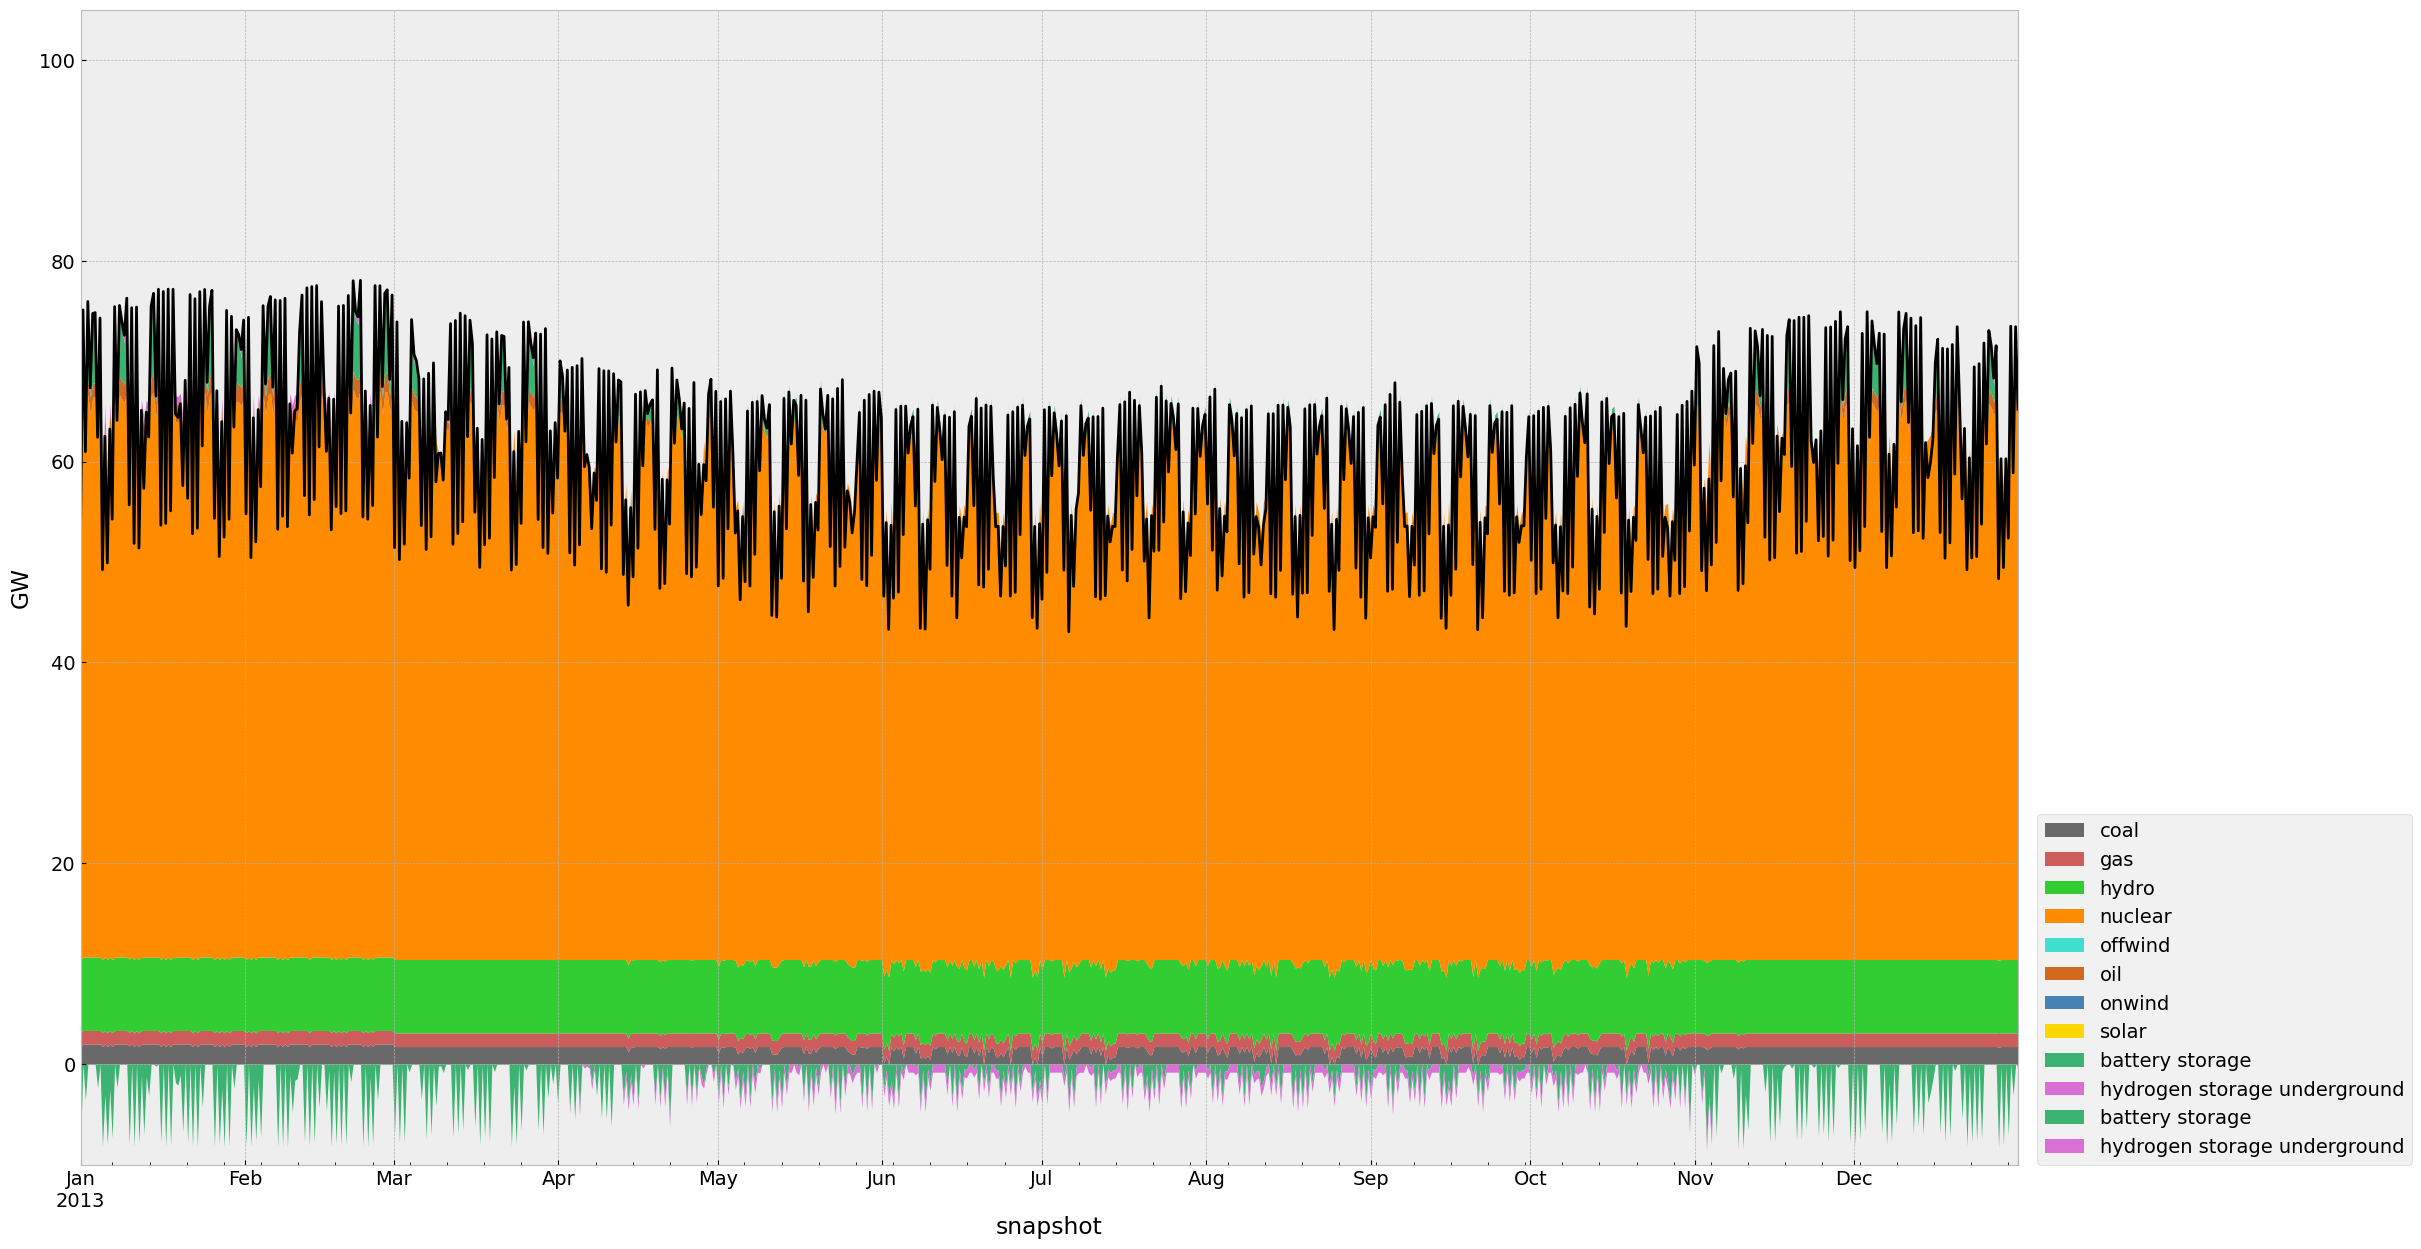

In [622]:
plot_dispatch(n, "2013", -10, 105)

In [623]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

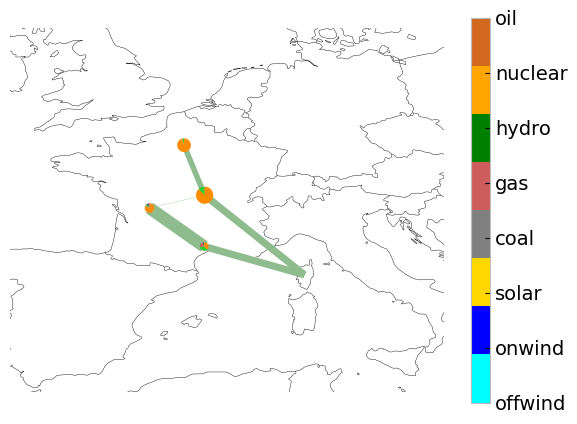

In [624]:
# Custom colors for different carriers
custom_colors = ["cyan", "blue", "gold", "grey", "indianred", "green", "orange", "chocolate"]
carriers = ["offwind", "onwind", "solar", "coal", "gas", "hydro", "nuclear", "oil"]

# Calculate capacities
capacities = n.generators_t.p.groupby([n.generators.bus, n.generators.carrier], axis=1).sum().sum()

# Setup the figure and axes
fig = plt.figure(figsize=(7, 10))
ax = plt.axes(projection=ccrs.epsg(4087))

# Normalize the link values and set colormap
norm = plt.Normalize(vmin=n.links_t.p0.iloc[0].abs().min(), vmax=n.links_t.p0.iloc[0].abs().max())
cmap = plt.get_cmap('jet')

# Plot the network
n.plot(
    ax=ax,
    margin=0.9,
    bus_sizes=capacities / 5e7 * 0.5,
    link_norm=norm,
    link_cmap=cmap,
    link_widths=n.links_t.p0.iloc[0].abs() / 1e3
)

# Normalize and create colormap for carriers
carrier_norm = mpl.colors.Normalize(vmin=1, vmax=8)
carrier_cmap = mpl.colors.ListedColormap(custom_colors)

# Create a scalar mappable for the carrier colorbar
sm = plt.cm.ScalarMappable(cmap=carrier_cmap, norm=carrier_norm)
sm.set_array([])

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, shrink=0.5)
cbar.ax.set_yticklabels(carriers)

plt.rcParams.update({'font.size': 8})

# Show the plot
plt.show()


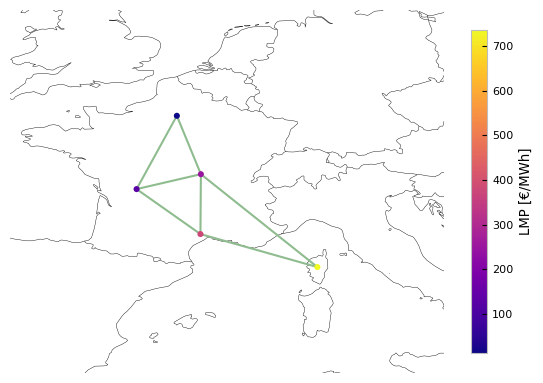

In [625]:
# Calculate normalization range for colormap
norm = plt.Normalize(vmin=n.buses_t.marginal_price.mean().min(), vmax=n.buses_t.marginal_price.mean().max())  # €/MWh

# Setup the figure and axes
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection=ccrs.epsg(4087))

# Plot the network with bus marginal prices
n.plot(
    margin=0.7,
    ax=ax,
    bus_colors=n.buses_t.marginal_price.mean(),
    bus_cmap='plasma',
    bus_norm=norm
)

# Create a scalar mappable for the colorbar
sm = plt.cm.ScalarMappable(cmap='plasma', norm=norm)
sm.set_array([])

# Add colorbar
cbar = plt.colorbar(sm, ax=ax, label="LMP [€/MWh]", shrink=0.6)

# Show the plot
plt.show()


In [626]:
n.buses_t.marginal_price.mean()

Bus
C    248.379221
I    736.968493
N     11.378788
S    376.430173
W    125.873133
dtype: float64

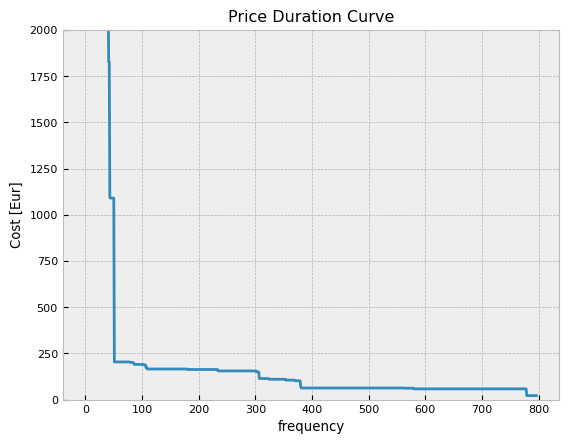

In [627]:
price_duration = n.buses_t.marginal_price
price_duration = price_duration.mean(axis=1)
price_duration = price_duration.sort_values(ascending=False).reset_index(drop=True)

# Plot the Price Duration Curve
plt.plot(price_duration)
plt.ylabel('Cost [Eur]')
plt.xlabel('frequency')
plt.title('Price Duration Curve')
plt.ylim(0, 2000)

# Show the plot
plt.show()

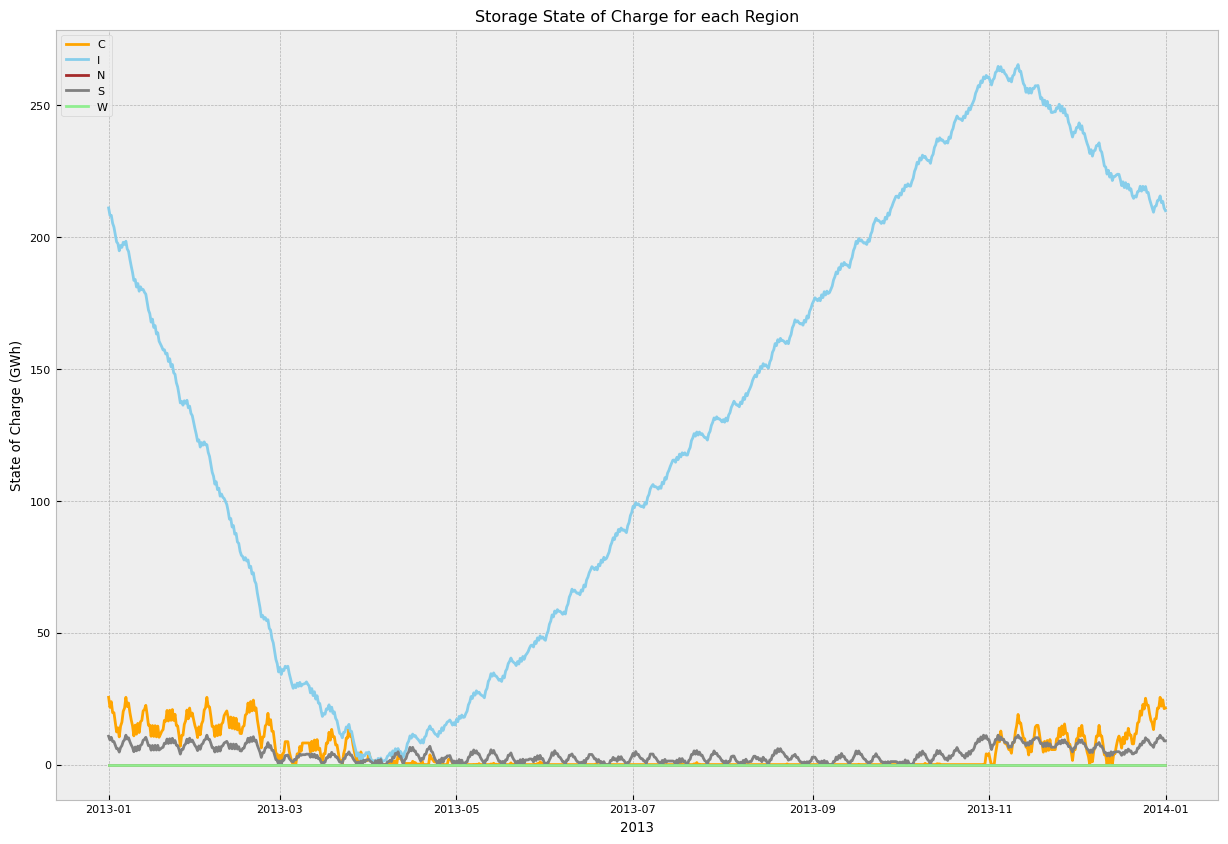

In [628]:
# Custom colors for each region
regioncolors = ["orange", "skyblue", "brown", "grey", "lightgreen"]

# Initialize a counter for color indexing
i = 0

# Calculate the state of charge for each region
state_of_charge = n.storage_units_t.state_of_charge.groupby([n.storage_units.bus], axis=1).sum()

# Setup the figure and axes
fig, ax = plt.subplots(figsize=(15, 10))

# Plot state of charge for each region
region_names = state_of_charge.columns
for region in region_names:
    x = state_of_charge[region] / 1e3
    ax.plot(x, color=regioncolors[i], label=region)
    i += 1

# Set plot attributes
plt.title('Storage State of Charge for each Region')
plt.legend(loc='upper left')
plt.ylabel('State of Charge (GWh)')
plt.xlabel('2013')

# Show the plot
plt.show()


In [629]:
def system_cost(n):
    tsc = n.statistics.capex() + n.statistics.opex()
    return tsc.droplevel(0).div(1e6) # million €/a

In [630]:
demand = n.snapshot_weightings.generators @ n.loads_t.p_set.sum(axis=1)
n_costperMW = system_cost(n).sum()*1e6 / demand.sum()
print(f'Total system cost is € {round(system_cost(n).sum()/ 1e3, 2)} Billion @ {round(n_costperMW,1)} €/MWh')

Total system cost is € 55.39 Billion @ 1152.0 €/MWh
